# Exploring Medical Appointment No-Show Patterns

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics import mosaicplot
import statsmodels.discrete.discrete_model as sm
from patsy import dmatrices
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
#import pydotplus
from IPython.display import Image 

In [21]:
### Read in csv file
noShowInfo = pd.read_csv("No-show-issue.csv")
print(noShowInfo.head())
print(noShowInfo.info())
print(noShowInfo.describe())

   Age Gender AppointmentRegistration        ApointmentData DayOfTheWeek  \
0   19      M    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z    Wednesday   
1   24      F    2015-08-18T07:01:26Z  2015-08-19T00:00:00Z    Wednesday   
2    4      F    2014-02-17T12:53:46Z  2014-02-18T00:00:00Z      Tuesday   
3    5      M    2014-07-23T17:02:11Z  2014-08-07T00:00:00Z     Thursday   
4   38      M    2015-10-21T15:20:09Z  2015-10-27T00:00:00Z      Tuesday   

    Status  Diabetes  Alcoolism  HiperTension  Handcap  Smokes  Scholarship  \
0  Show-Up         0          0             0        0       0            0   
1  Show-Up         0          0             0        0       0            0   
2  Show-Up         0          0             0        0       0            0   
3  Show-Up         0          0             0        0       0            0   
4  Show-Up         0          0             0        0       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0             0       

In [22]:
### Rename the variables
noShowInfo = noShowInfo.rename(columns = {'Alcoolism':'Alcoholism',
'HiperTension':'HyperTension', 'ApointmentData':'AppointmentDate',
'Handcap': 'Handicap'})

In [23]:
### Convert AwaitingTime into absolute values
noShowInfo.AwaitingTime = noShowInfo.AwaitingTime.apply(abs)

In [24]:
### Remove observations containing errors
noShowInfo = noShowInfo[noShowInfo['Age'] >= 0]
noShowInfo = noShowInfo[(noShowInfo['Handicap'] == 0) | (noShowInfo['Handicap'] == 1)]

In [25]:
### Replace the text values with 0 and 1 for two binary variables: Status & Gender
mapping_dict = {"Status": {"Show-Up" : 1, "No-Show" : 0},
                "Gender": {"M": 1, "F": 0} }
noShowInfo.replace(mapping_dict, inplace = True)

In [26]:
### Take a look at the cleaned dataset
print(noShowInfo.head())

### Summary Statistics
print(noShowInfo.info())
print(noShowInfo.describe())

   Age  Gender AppointmentRegistration       AppointmentDate DayOfTheWeek  \
0   19       1    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z    Wednesday   
1   24       0    2015-08-18T07:01:26Z  2015-08-19T00:00:00Z    Wednesday   
2    4       0    2014-02-17T12:53:46Z  2014-02-18T00:00:00Z      Tuesday   
3    5       1    2014-07-23T17:02:11Z  2014-08-07T00:00:00Z     Thursday   
4   38       1    2015-10-21T15:20:09Z  2015-10-27T00:00:00Z      Tuesday   

   Status  Diabetes  Alcoholism  HyperTension  Handicap  Smokes  Scholarship  \
0       1         0           0             0         0       0            0   
1       1         0           0             0         0       0            0   
2       1         0           0             0         0       0            0   
3       1         0           0             0         0       0            0   
4       1         0           0             0         0       0            0   

   Tuberculosis  Sms_Reminder  AwaitingTime  
0         

Pearson Correlation:  -0.00448610546885
Spearman Correlation:  -0.0762030673188


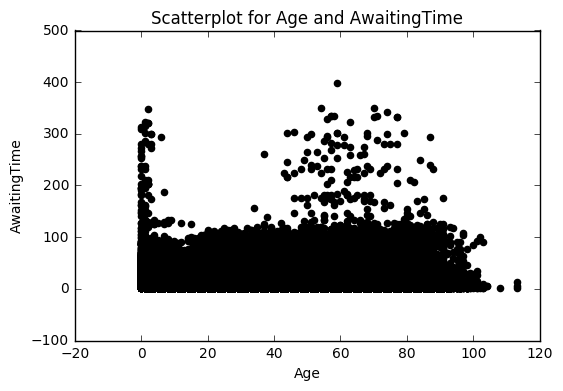

In [27]:
### Explore the relationship between Age and AwaitingTime

# Calculate Correlation
print("Pearson Correlation: ", noShowInfo['Age'].corr(noShowInfo['AwaitingTime'], method = "pearson"))
print("Spearman Correlation: ", noShowInfo['Age'].corr(noShowInfo['AwaitingTime'], method = "spearman"))

# Use scatterplot to visualize the relationship between the two variables
# reshape the columns
x = noShowInfo['Age'].values.reshape(len(noShowInfo), 1)
y = noShowInfo['AwaitingTime'].values.reshape(len(noShowInfo), 1)
plt.scatter(x, y, color = 'black')
plt.xlabel("Age")
plt.ylabel("AwaitingTime")
plt.title("Scatterplot for Age and AwaitingTime")
plt.show()

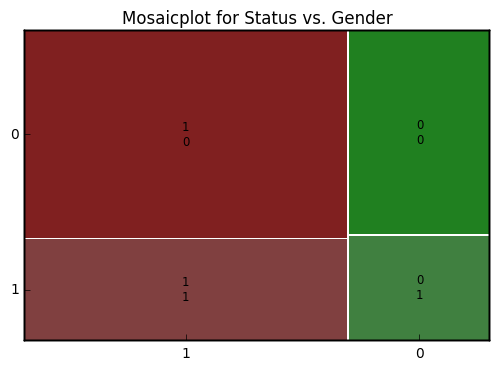

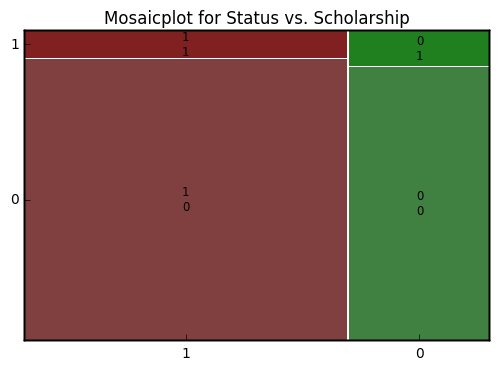

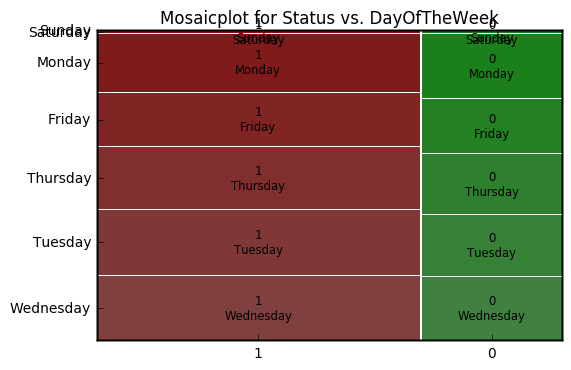

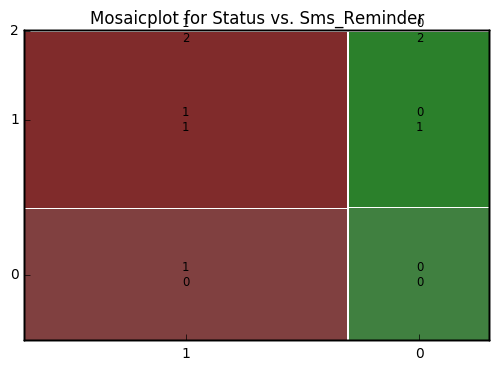

In [28]:
### Use Mosaicplots to Visualize Categorical Data
mosaic_gender = mosaicplot.mosaic(noShowInfo, ['Status', 'Gender'], title = "Mosaicplot for Status vs. Gender")
mosaic_scholarship = mosaicplot.mosaic(noShowInfo, ['Status', 'Scholarship'], title = "Mosaicplot for Status vs. Scholarship")
mosaic_dayOfTheWeek = mosaicplot.mosaic(noShowInfo, ['Status', 'DayOfTheWeek'], title = "Mosaicplot for Status vs. DayOfTheWeek")
mosaic_sms_reminder = mosaicplot.mosaic(noShowInfo, ['Status', 'Sms_Reminder'], title = "Mosaicplot for Status vs. Sms_Reminder")

Status      0       1
Gender               
0       59829  140417
1       30761   68488
Status           0       1
Scholarship               
0            80146  190336
1            10444   18569
Status            0      1
DayOfTheWeek              
Friday        16226  36473
Monday        19018  40169
Saturday        513    878
Sunday            1      5
Thursday      17824  42339
Tuesday       18124  44550
Wednesday     18884  44491
Status            0       1
Sms_Reminder               
0             38837   89433
1             51486  118943
2               267     529


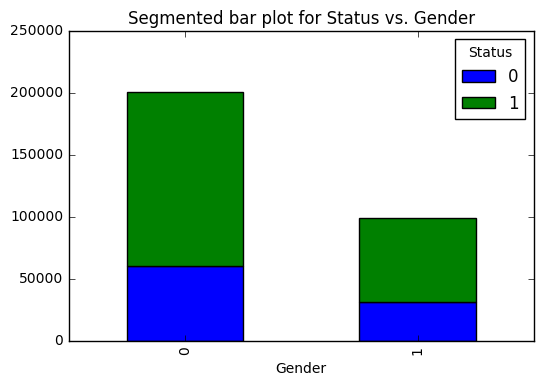

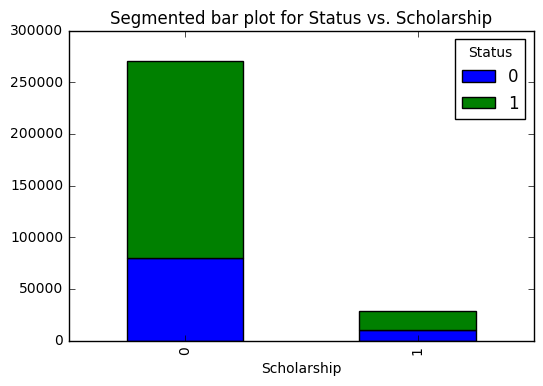

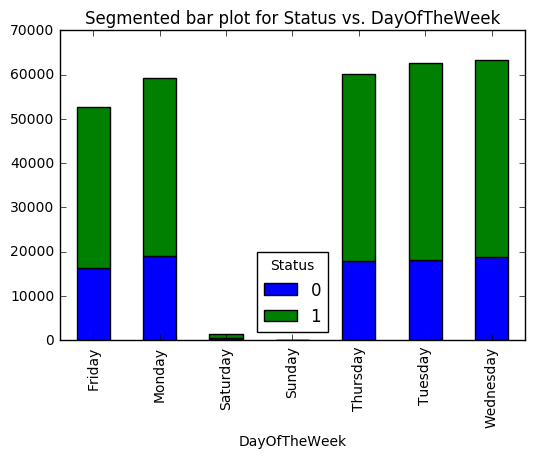

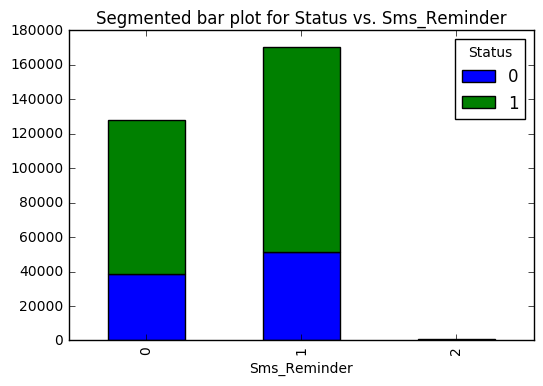

In [29]:
### Construct contingency tables and barplots
ctable_gender = pd.crosstab(noShowInfo.Gender, noShowInfo.Status)
print(ctable_gender)
ctable_gender.plot(kind = 'bar', stacked = True, title = "Segmented bar plot for Status vs. Gender")

ctable_scholarship = pd.crosstab(noShowInfo.Scholarship, noShowInfo.Status)
print(ctable_scholarship)
ctable_scholarship.plot(kind = 'bar', stacked = True, title = "Segmented bar plot for Status vs. Scholarship")

ctable_dayOfTheWeek = pd.crosstab(noShowInfo.DayOfTheWeek, noShowInfo.Status)
print(ctable_dayOfTheWeek)
ctable_dayOfTheWeek.plot(kind = 'bar', stacked = True, title = "Segmented bar plot for Status vs. DayOfTheWeek")

ctable_sms_reminder = pd.crosstab(noShowInfo.Sms_Reminder, noShowInfo.Status)
print(ctable_sms_reminder)
ctable_sms_reminder.plot(kind = 'bar', stacked = True, title = "Segmented bar plot for Status vs. Sms_Reminder")

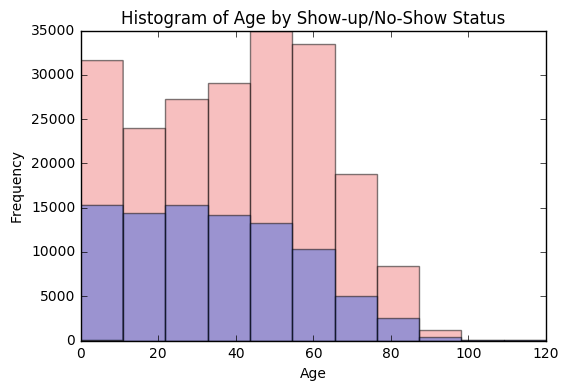

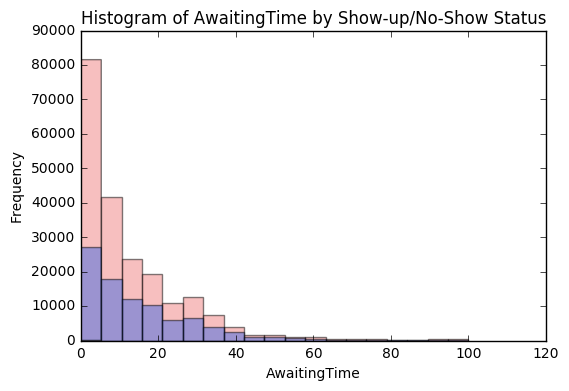

In [30]:
### Stacked histograms
histogram = plt.figure()
bins_age = np.linspace(0, 120, 12)
showUp = noShowInfo[noShowInfo['Status'] == 1]
noShow = noShowInfo[noShowInfo['Status'] == 0]
plt.hist(showUp.Age, bins_age, alpha = 0.5, color = 'lightcoral')
plt.hist(noShow.Age, bins_age, alpha = 0.5, color = 'royalblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Show-up/No-Show Status')
plt.show()

histogram = plt.figure()
bins_time = np.linspace(0, 100, 20)
plt.hist(showUp.AwaitingTime, bins_time, alpha = 0.5, color = 'lightcoral')
plt.hist(noShow.AwaitingTime, bins_time, alpha = 0.5, color = 'royalblue')
plt.xlabel('AwaitingTime')
plt.ylabel('Frequency')
plt.title('Histogram of AwaitingTime by Show-up/No-Show Status')
plt.show()

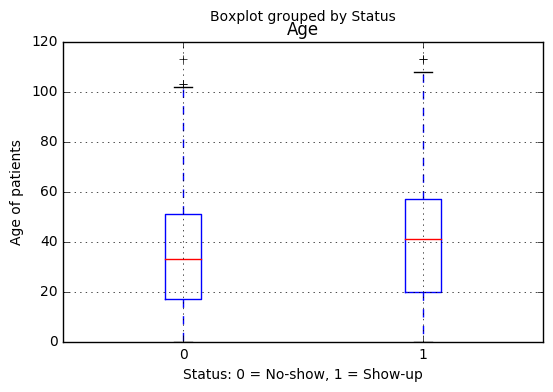

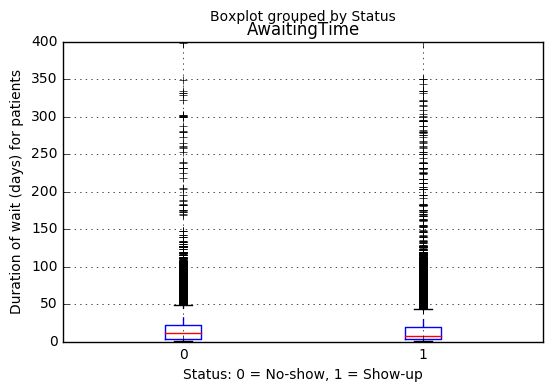

In [31]:
### Boxplots grouped by Status
boxplot1 = noShowInfo.boxplot(column = ['Age'], by = ['Status'])
boxplot1.set_xlabel('Status: 0 = No-show, 1 = Show-up')
boxplot1.set_ylabel('Age of patients')

boxplot2 = noShowInfo.boxplot(column = ['AwaitingTime'], by = ['Status'])
boxplot2.set_xlabel('Status: 0 = No-show, 1 = Show-up')
boxplot2.set_ylabel('Duration of wait (days) for patients')

In [32]:
### Dummy Coding for DayOfTheWeek
# The number of dummy variables is one less than the number of categories.
# Choose DayOfTheWeek_Sunday as our reference (baseline) category.

dummy_DayOfTheWeek = pd.get_dummies(noShowInfo['DayOfTheWeek'], prefix = "DayOfTheWeek")
# drop the reference category
dummy_DayOfTheWeek = dummy_DayOfTheWeek.drop('DayOfTheWeek_Sunday', axis = 1)
print(dummy_DayOfTheWeek.head())
noShowInfo = noShowInfo.drop('DayOfTheWeek', axis = 1)
noShowInfo = pd.concat([noShowInfo, dummy_DayOfTheWeek], axis = 1)

print(noShowInfo.head())

   DayOfTheWeek_Friday  DayOfTheWeek_Monday  DayOfTheWeek_Saturday  \
0                    0                    0                      0   
1                    0                    0                      0   
2                    0                    0                      0   
3                    0                    0                      0   
4                    0                    0                      0   

   DayOfTheWeek_Thursday  DayOfTheWeek_Tuesday  DayOfTheWeek_Wednesday  
0                      0                     0                       1  
1                      0                     0                       1  
2                      0                     1                       0  
3                      1                     0                       0  
4                      0                     1                       0  
   Age  Gender AppointmentRegistration       AppointmentDate  Status  \
0   19       1    2014-12-16T14:46:25Z  2015-01-14T00:00:00Z       1 

In [33]:
### Randomly splitting the data into traing set (80%) and test set (20%)
train = noShowInfo.sample(frac = 0.8, random_state = 42)
test = noShowInfo.drop(train.index)
print(train.head())

        Age  Gender AppointmentRegistration       AppointmentDate  Status  \
151662   66       0    2014-10-20T11:35:54Z  2014-10-22T00:00:00Z       1   
38120    22       0    2014-09-22T14:06:41Z  2014-10-03T00:00:00Z       0   
157863   70       0    2014-04-30T10:29:31Z  2014-05-02T00:00:00Z       1   
110471   30       0    2015-03-05T09:37:24Z  2015-03-09T00:00:00Z       0   
238013    0       1    2014-11-18T16:35:05Z  2014-11-21T00:00:00Z       1   

        Diabetes  Alcoholism  HyperTension  Handicap  Smokes  Scholarship  \
151662         0           0             0         0       0            0   
38120          0           0             0         0       0            0   
157863         0           0             1         0       0            0   
110471         0           0             0         0       0            0   
238013         0           0             0         0       0            0   

        Tuberculosis  Sms_Reminder  AwaitingTime  DayOfTheWeek_Friday  \
1

In [34]:
### Logistic Regression Models
## statsmodels
# A full model with all the predictor variables
y1, X1 = dmatrices('Status ~ Age + Gender + Diabetes + Alcoholism + HyperTension + Tuberculosis + Handicap + Smokes + Scholarship + Sms_Reminder + AwaitingTime + DayOfTheWeek_Monday + DayOfTheWeek_Tuesday + DayOfTheWeek_Wednesday + DayOfTheWeek_Thursday + DayOfTheWeek_Friday + DayOfTheWeek_Saturday', train, return_type = 'dataframe')
full_model = sm.Logit(y1, X1)
full_model_result = full_model.fit()
print(full_model_result.summary())

Optimization terminated successfully.
         Current function value: 0.603302
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:               239596
Model:                          Logit   Df Residuals:                   239578
Method:                           MLE   Df Model:                           17
Date:                Fri, 29 Sep 2017   Pseudo R-squ.:                 0.01463
Time:                        17:29:26   Log-Likelihood:            -1.4455e+05
converged:                       True   LL-Null:                   -1.4669e+05
                                        LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.0575      1.121      0.943      0.345      -1.140      

In [35]:
## statsmodels
# A refined model with selected predictor variables
y2, X2 = dmatrices('Status ~ Age + Alcoholism + HyperTension + Smokes + Scholarship + Sms_Reminder + AwaitingTime', train, return_type = 'dataframe')
refined_model = sm.Logit(y2, X2)
refined_model_result = refined_model.fit()
print(refined_model_result.summary())

Optimization terminated successfully.
         Current function value: 0.603694
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:               239596
Model:                          Logit   Df Residuals:                   239588
Method:                           MLE   Df Model:                            7
Date:                Fri, 29 Sep 2017   Pseudo R-squ.:                 0.01399
Time:                        17:29:27   Log-Likelihood:            -1.4464e+05
converged:                       True   LL-Null:                   -1.4669e+05
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6170      0.011     57.278      0.000       0.596       0.638
Age              0.0092

In [36]:
## scikit-learn
X_train = train[['Age', 'Alcoholism', 'HyperTension', 'Smokes', 'Scholarship', 'Sms_Reminder', 'AwaitingTime']]
y_train = train.Status
X_test = test[['Age', 'Alcoholism', 'HyperTension', 'Smokes', 'Scholarship', 'Sms_Reminder', 'AwaitingTime']]
y_test = test.Status

logit_model = LogisticRegression()
train_model = logit_model.fit(X_train, y_train)
print('Accuracy of logistic regression model from scikit-learn:', round(train_model.score(X_test, y_test), 3) * 100, '%')
predicted = train_model.predict(X_test)
print(classification_report(y_test, predicted))

Accuracy of logistic regression model from scikit-learn: 69.4 %
             precision    recall  f1-score   support

          0       0.50      0.00      0.01     18315
          1       0.69      1.00      0.82     41584

avg / total       0.64      0.69      0.57     59899



In [37]:
### Multinomial Naive Bayes Classifier
## independence assumptions between the predictor variables
## scikit-learn
NB_model = MultinomialNB().fit(X_train, y_train)
print('Accuracy of Multinomial Naive Bayes Classifier:', round(accuracy_score(y_test, NB_model.predict(X_test)), 3) * 100, '%')

Accuracy of Multinomial Naive Bayes Classifier: 60.7 %


In [38]:
### Decision tree
y_tree = train.Status
X_tree = train.drop(['AppointmentRegistration', 'AppointmentDate', 'Status'], axis = 1)
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = None)
clf = clf.fit(X_tree, y_tree)